# 라이브러리 불러오기      

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import PIL
import cv2
import os
from PIL import Image
from tqdm import tqdm
from glob import glob

import torch
from torch import nn
from torchvision import models
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

# 경로지정

In [2]:
file_path_1 = './DATA/Bag/Json/가방_일반,가로50CM미만_정면.json'
file_path_2 = './DATA/Chair/json/의자_기타_정면.json'
file_path_3 = './DATA/fan/json/선풍기_가정용_정면.json'
file_path_4 = './DATA/LongChair/json/의자_장_정면.json'
file_path_5 = './DATA/LongChair/json/의자_장_정면_2.json'
file_path_6 = './DATA/LongChair/json/의자_장_정면_3.json'
file_path_7 = './DATA/Ricecooker/json/전기밥솥,보온밥통_전체_정면.json'

DIR_PATH_1 = "./DATA/Bag/images/"
DIR_PATH_2 = "./DATA/Chair/images/"
DIR_PATH_3 = "./DATA/fan/images/"
DIR_PATH_4 = "./DATA/LongChair/images/"
DIR_PATH_5 = "./DATA/Ricecooker/images/"

# 파일 불러오기

In [3]:
with open(file_path_1, 'r', encoding="UTF-8") as file :
    data=json.load(file)
    bag_data = pd.DataFrame(data)
    
with open(file_path_2, 'r', encoding="UTF-8") as file :
    data=json.load(file)
    chair_data = pd.DataFrame(data)
    
with open(file_path_3, 'r', encoding="UTF-8") as file :
    data=json.load(file)
    fan_data = pd.DataFrame(data)
    
with open(file_path_4, 'r', encoding="UTF-8") as file :
    longchair_data_1=json.load(file)
    longchair_data_1 = pd.DataFrame(longchair_data_1)
    
with open(file_path_5, 'r', encoding="UTF-8") as file :
    longchair_data_2=json.load(file)
    longchair_data_2 = pd.DataFrame(longchair_data_2)
    
with open(file_path_6, 'r', encoding="UTF-8") as file :
    longchair_data_3=json.load(file)
    longchair_data_3 = pd.DataFrame(longchair_data_3)
    
longchair_data = pd.concat([longchair_data_1, longchair_data_2, longchair_data_3])
        
with open(file_path_7, 'r', encoding="UTF-8") as file :
    data=json.load(file)
    ricecooker_data = pd.DataFrame(data)

# 데이터전처리

In [4]:
bag_filename=os.listdir(DIR_PATH_1)
chair_filename=os.listdir(DIR_PATH_2)
fan_filename=os.listdir(DIR_PATH_3)
longchair_filename=os.listdir(DIR_PATH_4)
ricecooker_filename=os.listdir(DIR_PATH_5)

bag_list = bag_data[bag_data['filename'].isin(bag_filename)]
chair_list = chair_data[chair_data['filename'].isin(chair_filename)]
fan_list = fan_data[fan_data['filename'].isin(fan_filename)]
longchair_list = longchair_data[longchair_data['filename'].isin(longchair_filename)]
ricecooker_list = ricecooker_data[ricecooker_data['filename'].isin(ricecooker_filename)]

bag_path = glob('./DATA/Bag/images/*')
chair_path = glob('./DATA/Chair/images/*')
longchair_path = glob('./DATA/LongChair/images/*')
fan_path = glob('./DATA/fan/images/*')
ricecooker_path = glob('./DATA/Ricecooker/images/*')

In [5]:
item_list = [eval('bag_list'), eval('chair_list'), eval('fan_list'), eval('longchair_list'), eval('ricecooker_list')]
class_2 = []

for item in item_list :
    if(item.equals(eval('longchair_list'))) :
        class_3=item[['filename','class3']]    
    else :
        class_2.append(item[['filename','class2']])


        
class_2 = pd.concat(class_2)

class_3.rename(columns = {'class3' : 'class2'}, inplace = True)

project_df=pd.concat([class_2, class_3])

label = []

for i in project_df['class2']:
    if i in '가방':
        label.append(0)
    elif i in '의자':
        label.append(1)
    elif i in '선풍기':
        label.append(2)
    elif i in '전기밥솥,보온밥통':
        label.append(3)
    else:
        label.append(4)

project_df['label'] = label  

/tmp/ipykernel_3260627/264304313.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_3.rename(columns = {'class3' : 'class2'}, inplace = True)


# 경로추가

In [6]:
filepaths=[]

filelist=os.listdir(DIR_PATH_1)
for f in filelist:
    fpath=os.path.join(DIR_PATH_1,f)
    filepaths.append(fpath)

filelist=os.listdir(DIR_PATH_2)
for f in filelist:
    fpath=os.path.join(DIR_PATH_2,f)
    filepaths.append(fpath)
    
filelist=os.listdir(DIR_PATH_3)
for f in filelist:
    fpath=os.path.join(DIR_PATH_3,f)
    filepaths.append(fpath)

filelist=os.listdir(DIR_PATH_5)
for f in filelist:
    fpath=os.path.join(DIR_PATH_5,f)
    filepaths.append(fpath)
    
filelist=os.listdir(DIR_PATH_4)
for f in filelist:
    fpath=os.path.join(DIR_PATH_4,f)
    filepaths.append(fpath)

project_df['path'] = filepaths 

In [7]:
project_csv=project_df.to_csv('project_csv', mode = 'w', index= False)

# 훈련, 테스트 나누기

In [8]:
df=pd.read_csv('project_csv')

X=df['filename']
Y=df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=21)

train_csv = df[df['filename'].isin(X_train)]
test_csv = df[df['filename'].isin(X_test)]


print(Y_train.value_counts())

1    167
3    158
0    157
2    157
4    140
Name: label, dtype: int64


In [9]:
train_csv.reset_index(inplace = True)
train_csv.drop('index', axis = 1, inplace = True)

test_csv.reset_index(inplace = True)
test_csv.drop('index', axis = 1, inplace = True)

/tmp/ipykernel_3260627/81830325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_csv.drop('index', axis = 1, inplace = True)
/tmp/ipykernel_3260627/81830325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_csv.drop('index', axis = 1, inplace = True)


# 이미지 확인

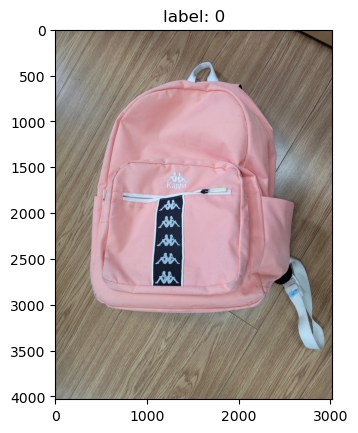

In [10]:
sample_image = Image.open('./DATA/Bag/images/' + X_train[0])
sample_label = Y_train[0]
plt.title('label: ' + str(sample_label))
plt.imshow(sample_image)

In [11]:
print(np.shape(sample_image))

(4032, 3024, 3)


# 캐시 초기화

In [12]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

# Settings

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch_size = 5
class_n = len(train_csv['label'].unique())
learning_rate = 1e-6
epochs = 100
save_path = './DATA/'

In [14]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "2,3"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Device:', device)  # 출력결과: cuda 
print('Count of using GPUs:', torch.cuda.device_count())   #출력결과: 2 (2, 3 두개 사용하므로)
print('Current cuda device:', torch.cuda.current_device())  # 출력결과: 2 (2, 3 중 앞의 GPU #2 의미)


Device: cuda
Count of using GPUs: 0
Current cuda device: 0


In [15]:
class CustomDataset(Dataset):
    def __init__(self, files, labels=None, mode='train'):
        self.mode = mode
        self.files = files
        if mode == 'train':
            self.labels = labels
            
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, i):
        if self.mode == 'train':
            img = cv2.imread(self.files[i])
            img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_AREA)
            img = img.astype(np.float32)/255
            img = np.transpose(img, (2,0,1))
            return {
                'img' : torch.tensor(img, dtype=torch.float32),
                'label' : torch.tensor(self.labels[i], dtype=torch.long)
            }
        else:
            img = cv2.imread(self.files[i])
            img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_AREA)
            img = img.astype(np.float32)/255
            img = np.transpose(img, (2,0,1))
            return {
                'img' : torch.tensor(img, dtype=torch.float32),
            }

In [16]:
train_dataset = CustomDataset(train_csv['path'], train_csv['label'].values)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=16, shuffle=True)

test_dataset = CustomDataset(test_csv['path'], test_csv['label'].values)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=16, shuffle=False)

In [17]:
class CNN_Model(nn.Module):
    def __init__(self, class_n, rate=0.1):
        super(CNN_Model, self).__init__()
        self.model = models.resnet50(pretrained=True)
        self.dropout = nn.Dropout(rate)
        self.output_layer = nn.Linear(in_features=1000, out_features=class_n, bias=True)
    
    def forward(self, inputs):
        output = self.output_layer(self.dropout(self.model(inputs)))
        return output

In [18]:
model = CNN_Model(class_n).to(device)

/home/user/anaconda3/envs/Junhyeok/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/anaconda3/envs/Junhyeok/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [20]:
def train_step(batch_item, epoch, batch, training):
    img = batch_item['img'].to(device)
    label = batch_item['label'].to(device)
    if training is True:
        model.train()
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            output = model(img)
            loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        return loss
    else:
        model.eval()
        with torch.no_grad():
            output = model(img)
            loss = criterion(output, label)
            
        return loss

In [21]:
loss_plot, test_loss_plot = [], []

for epoch in range(epochs):
    total_loss, total_test_loss = 0, 0
    
    tqdm_dataset = tqdm(enumerate(train_dataloader))
    training = True
    for batch, batch_item in tqdm_dataset:
        batch_loss = train_step(batch_item, epoch, batch, training)
        total_loss += batch_loss
        
        tqdm_dataset.set_postfix({
            'Epoch': epoch + 1,
            'Loss': '{:06f}'.format(batch_loss.item()),
            'Total Loss' : '{:06f}'.format(total_loss/(batch+1))
        })
    loss_plot.append(total_loss/(batch+1))
    
    tqdm_dataset = tqdm(enumerate(test_dataloader))
    training = False
    for batch, batch_item in tqdm_dataset:
        batch_loss = train_step(batch_item, epoch, batch, training)
        total_test_loss += batch_loss
        
        tqdm_dataset.set_postfix({
            'Epoch': epoch + 1,
            'Val Loss': '{:06f}'.format(batch_loss.item()),
            'Total Test Loss' : '{:06f}'.format(total_test_loss/(batch+1))
        })
    test_loss_plot.append(total_test_loss/(batch+1))
    
#     if np.min(test_loss_plot) == test_loss_plot[-1]:
#         torch.save(model, save_path)

156it [00:09, 16.77it/s, Epoch=1, Loss=1.268921, Total Loss=1.598366]
39it [00:02, 17.93it/s, Epoch=1, Val Loss=1.998646, Total Test Loss=1.221692]
156it [00:07, 19.68it/s, Epoch=2, Loss=1.208130, Total Loss=1.116252]
39it [00:02, 16.96it/s, Epoch=2, Val Loss=1.404512, Total Test Loss=0.834939]
156it [00:08, 18.28it/s, Epoch=3, Loss=0.982178, Total Loss=0.827525]
39it [00:02, 16.84it/s, Epoch=3, Val Loss=0.876708, Total Test Loss=0.605274]
156it [00:08, 19.15it/s, Epoch=4, Loss=1.222626, Total Loss=0.715587]
39it [00:02, 18.02it/s, Epoch=4, Val Loss=0.679392, Total Test Loss=0.469705]
156it [00:07, 20.49it/s, Epoch=5, Loss=0.508606, Total Loss=0.598018]
39it [00:02, 17.93it/s, Epoch=5, Val Loss=0.478431, Total Test Loss=0.390759]
156it [00:07, 20.26it/s, Epoch=6, Loss=0.765259, Total Loss=0.536107]
39it [00:02, 17.01it/s, Epoch=6, Val Loss=0.419014, Total Test Loss=0.319752]
156it [00:07, 19.57it/s, Epoch=7, Loss=0.221992, Total Loss=0.485721]
39it [00:02, 18.51it/s, Epoch=7, Val Loss=

In [22]:
loss_plot = torch.Tensor(loss_plot)
loss_plot = loss_plot.numpy()

val_loss_plot = torch.Tensor(test_loss_plot)
val_loss_plot = val_loss_plot.numpy()

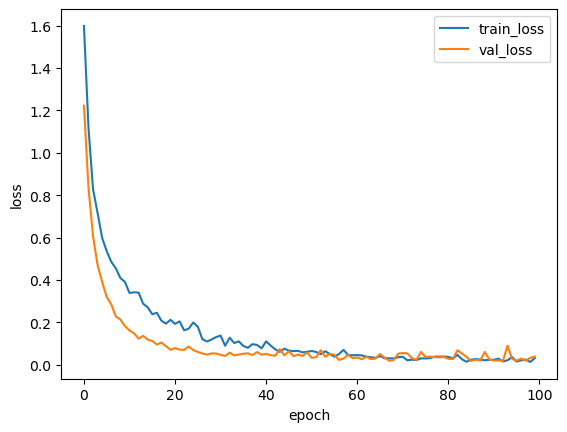

In [23]:
plt.plot(loss_plot, label='train_loss')
plt.plot(val_loss_plot, label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()